In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv')

<Axes: xlabel='placement_exam_marks'>

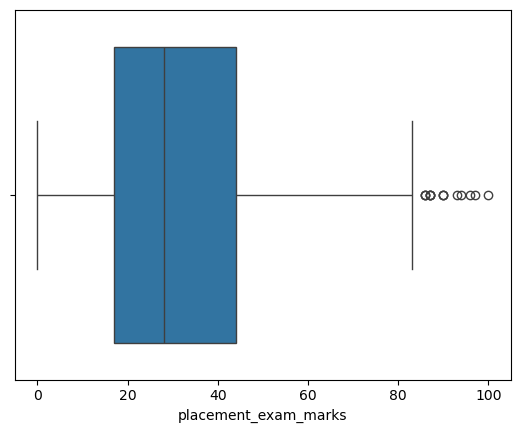

In [ ]:
sns.boxplot(x = df['placement_exam_marks'])

For Skewed

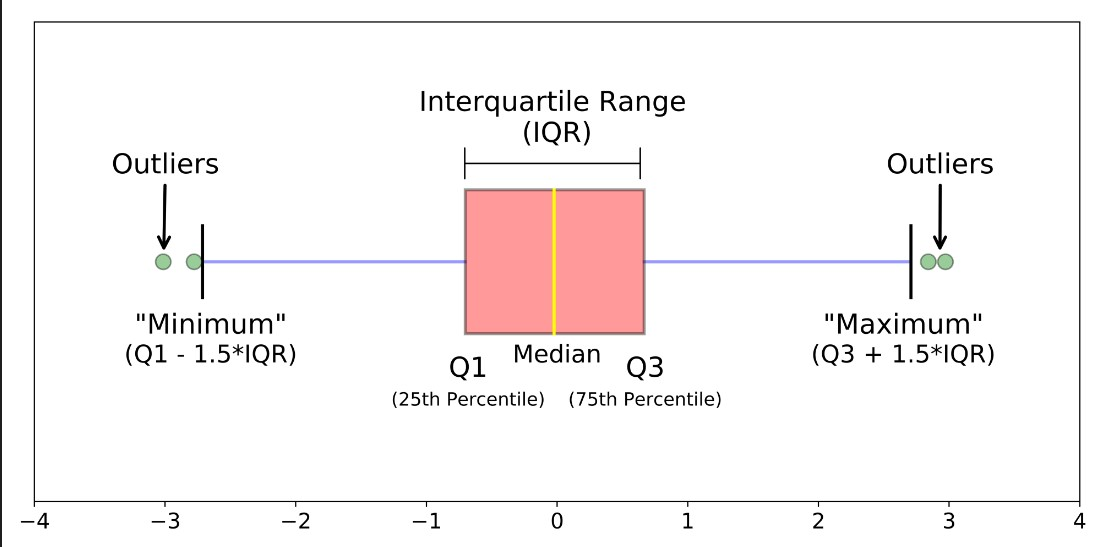

In [9]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


In [10]:
new_df = df.copy()

new_df['placement_exam_marks'] = np.where(
    new_df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df['placement_exam_marks']
    )
)

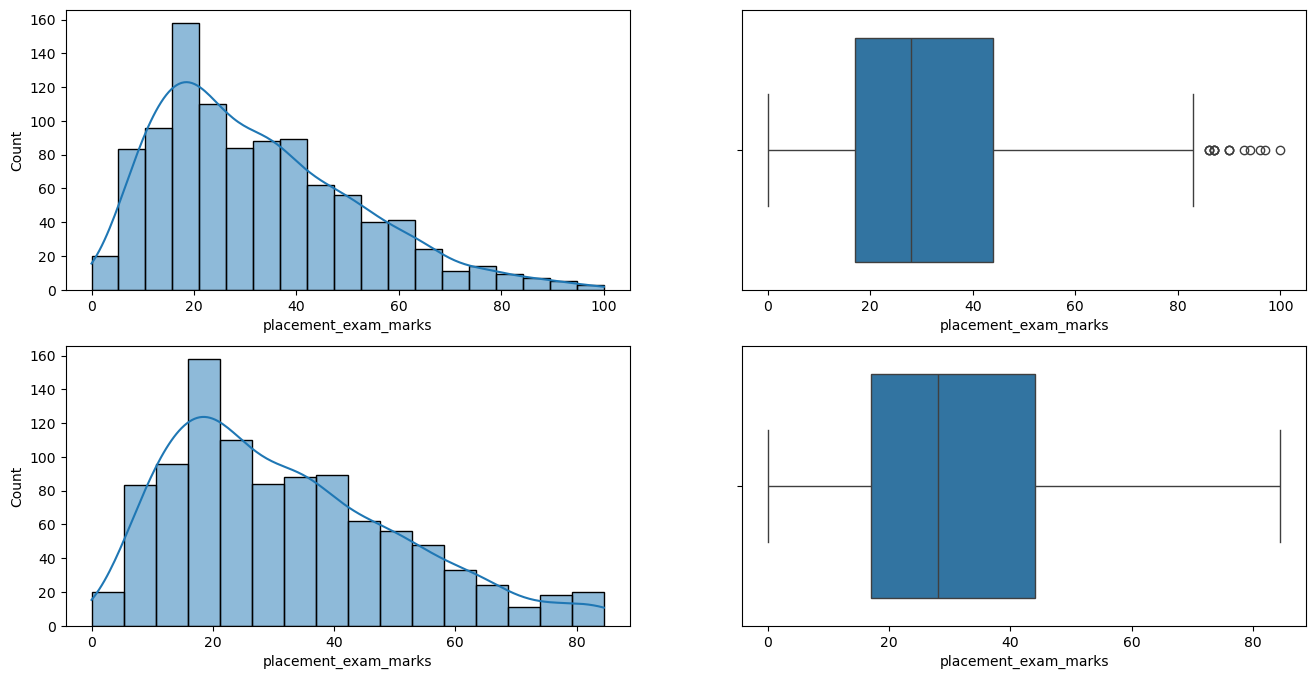

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(x = new_df['placement_exam_marks'])

plt.show()
